In [ ]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
def myshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

In [ ]:
def image_crop(image, min_ratio=0.6, max_ratio=1.0):
    h,w,c = image.shape
    ratio = random.random()
    scale = min_ratio + ratio * (max_ratio - min_ratio)    
    new_h = int(h*scale)    
    new_w = int(w*scale)    
    y = np.random.randint(0, h - new_h)    
    x = np.random.randint(0, w - new_w)    
    image = image[y:y+new_h, x:x+new_w, :]    
    return image

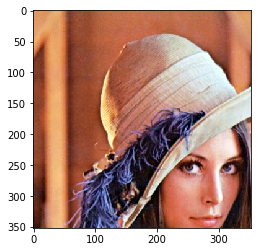

In [4]:
img_ori = cv2.imread('lenna.jpg')
img_crop = image_crop(img_ori, min_ratio=0.5, max_ratio=0.8)
myshow(img_crop)

In [5]:
def color_shift(image):
    B, G, R = cv2.split(image)
    colors = [B, G, R]
    rlist = random.sample(colors, 3)
#     img = cv2.merge((R, G, B))
    img = cv2.merge(tuple(rlist))
    
    return img

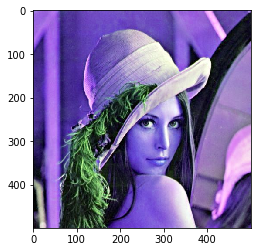

In [6]:
img = cv2.imread('lenna.jpg')
img_cs = color_shift(img)
myshow(img_cs)

In [7]:
import math
def rotation(image, angle):
    height, width = image.shape[:2]
    
    if angle % 180 == 0:
        scale = 1
    elif angle % 90 == 0:
        scale = float(max(height, width))/min(height, width)
    else:
        scale = math.sqrt(pow(height,2)+pow(width,2))/min(height, width)
    
    print('scale: {}'.format(scale))
    
    rotateMat = cv2.getRotationMatrix2D((width/2, height/2), angle, scale)  
    rotateImg = cv2.warpAffine(img, rotateMat, (width, height))  
    return rotateImg

scale: 1.4142135623730951


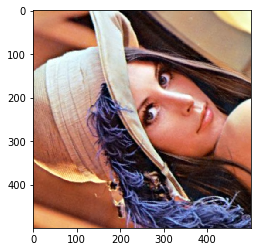

In [8]:
img_rot = rotation(img_ori, 70)
myshow(img_rot)

In [17]:
def rad(x):
    return x * np.pi / 180
def perspective_transform(img, anglex=0, angley=30, anglez=0):
    w, h = img.shape[:2]
    fov = 42
    
    z = np.sqrt(w ** 2 + h ** 2) / 2 / np.tan(rad(fov / 2))
    
    rx = np.array([[1, 0, 0, 0],
          [0, np.cos(rad(anglex)), -np.sin(rad(anglex)), 0],
          [0, -np.sin(rad(anglex)), np.cos(rad(anglex)), 0, ],
          [0, 0, 0, 1]], np.float32)
 
    ry = np.array([[np.cos(rad(angley)), 0, np.sin(rad(angley)), 0],
          [0, 1, 0, 0],
          [-np.sin(rad(angley)), 0, np.cos(rad(angley)), 0, ],
          [0, 0, 0, 1]], np.float32)
 
    rz = np.array([[np.cos(rad(anglez)), np.sin(rad(anglez)), 0, 0],
          [-np.sin(rad(anglez)), np.cos(rad(anglez)), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]], np.float32)
 
    r = rx.dot(ry).dot(rz)
    
    # 四对点的生成
    pcenter = np.array([h / 2, w / 2, 0, 0], np.float32)
 
    p1 = np.array([0, 0, 0, 0], np.float32) - pcenter
    p2 = np.array([w, 0, 0, 0], np.float32) - pcenter
    p3 = np.array([0, h, 0, 0], np.float32) - pcenter
    p4 = np.array([w, h, 0, 0], np.float32) - pcenter
 
    dst1 = r.dot(p1)
    dst2 = r.dot(p2)
    dst3 = r.dot(p3)
    dst4 = r.dot(p4)
 
    list_dst = [dst1, dst2, dst3, dst4]
 
    org = np.array([[0, 0],
          [w, 0],
          [0, h],
          [w, h]], np.float32)
 
    dst = np.zeros((4, 2), np.float32)
 
  # 投影至成像平面
    for i in range(4):
        dst[i, 0] = list_dst[i][0] * z / (z - list_dst[i][2]) + pcenter[0]
        dst[i, 1] = list_dst[i][1] * z / (z - list_dst[i][2]) + pcenter[1]
 
    warpR = cv2.getPerspectiveTransform(org, dst)
 
    img_persp = cv2.warpPerspective(img, warpR, (h, w))
    
    return img_persp

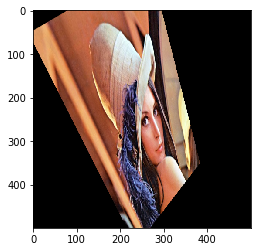

In [19]:
img_persp = perspective_transform(img_ori, 20, 60, 40)
myshow(img_persp)